## Project: PCA and tSNE
 **Marks: 30**
-----------------------------

Welcome to the project on PCA and tSNE. In this project. We will be using the auto-mpg dataset.

-----------------------------
## Objective: 
-----------------------------
The objective of this problem is to explore the data and reduce the number of features by using dimensionality reduction techniques like PCA and TSNE and generate meaningful insights. 

-----------------------------
## Dataset: 
-----------------------------
There are 8 variables in the data: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from O to 60 mph (sec.)
- yr: model year
- car name: car model name

## Importing necessary libraries and overview of the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#### Loading data

In [2]:
file_path = '/content/auto-mpg.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


#### Check the info of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**Observations:**

- There are 398 observations and 8 columns in the data.
- All variables except horsepower and car name are of numeric data type.
- The horsepower must be a numeric data type. We will explore this further.

## Data Preprocessing and Exploratory Data Analysis

In [5]:
data["car name"].nunique()

305

- The column 'car name' is of object data type containing a lot of unique entries and would not add values to our analysis. We can drop this column.

In [6]:
# dropping car_name
data1 = data.copy()
data = data.drop(['car name'], axis=1)

#### Checking values in horsepower column

In [7]:
# checking if there are values other than digits in the column 'horsepower' 
hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())  # if the string is made of digits store True else False

# print isDigit = False!
data[hpIsDigit['horsepower'] == False]   # from temp take only those rows where hp has false

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


**Observations:**
- There are 6 observations where horsepower is ?.
- We can consider these values as missing values.
- Let's impute these missing values and change the data type of horsepower column.
- First we need to replace the ? with np.nan.

In [8]:
#Relacing ? with np.nan
data = data.replace('?', np.nan)
data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [9]:
# Imputing the missing values with median value
data.horsepower.fillna(data.horsepower.median(), inplace=True)
data['horsepower'] = data['horsepower'].astype('float64')  # converting the hp column from object data type to float

#### Summary Statistics

#### Question 1: 
- **Check the summary statistics of the data (use describe function) (1 Mark)**
- **Write your observations (1 Mark)**

In [10]:
#Write your code here

data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


**Observations:**

- For most of the variables (especially mpg, acceleration, and model year), the mean and median are almost exactly equal, indicating an absence of skew in the data. Moreover, the mean for all variables is higher than the respective median, indicating a slight positive skew for all variables.  
- Based on the comparison of the min and max values with 25th percentile - 1.5xIQR and 75th percentile + 1.5xIQR, respectively, there do not appear to be extreme outliers for any of the variables.   

#### Let's check the distribution and outliers for each column in the data

#### Question 2:
- **Create the histogram to check distribution of all variables (use .hist() attribute) (1 Mark)**
- **Create boxplot to visualize outliers for all variables (use sns.boxplot()) (1 Mark)**
- **Write your observations (2 Marks)**

mpg
Skew : 0.46


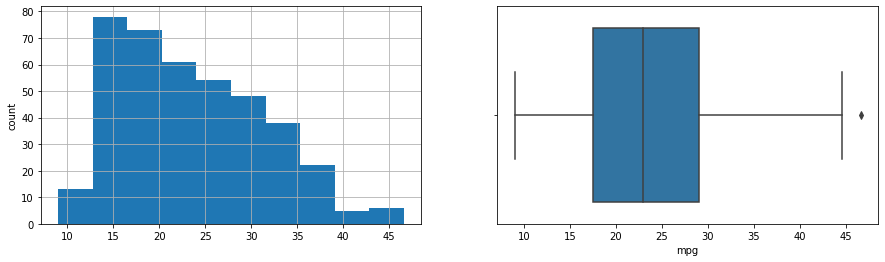

cylinders
Skew : 0.53


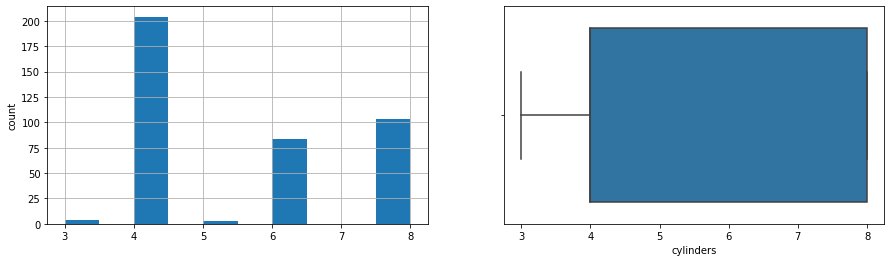

displacement
Skew : 0.72


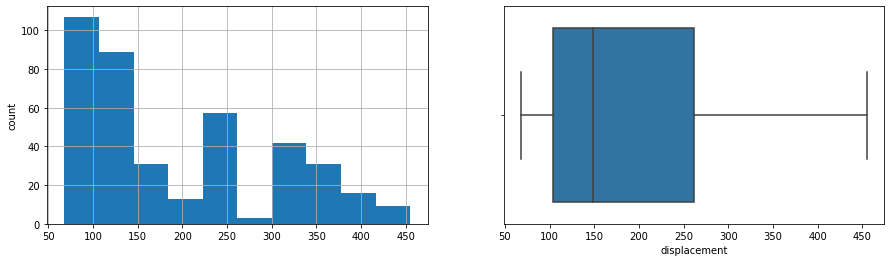

horsepower
Skew : 1.11


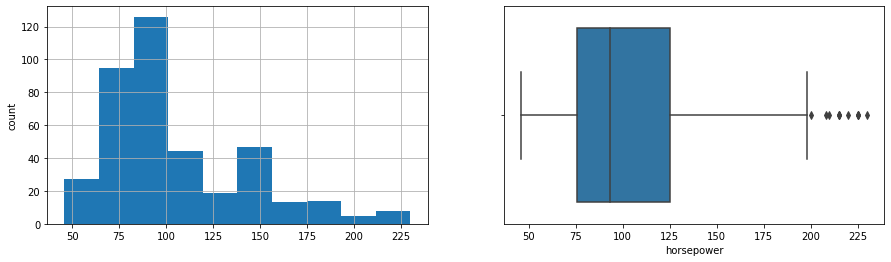

weight
Skew : 0.53


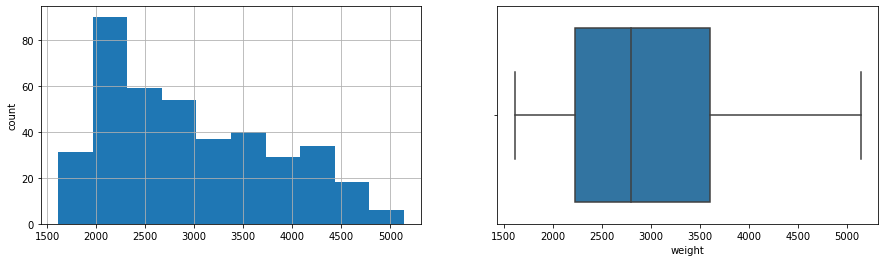

acceleration
Skew : 0.28


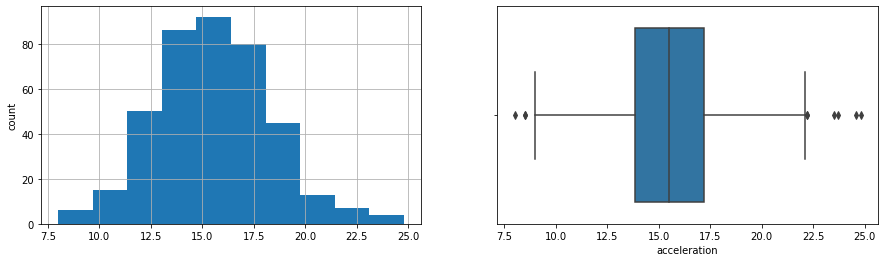

model year
Skew : 0.01


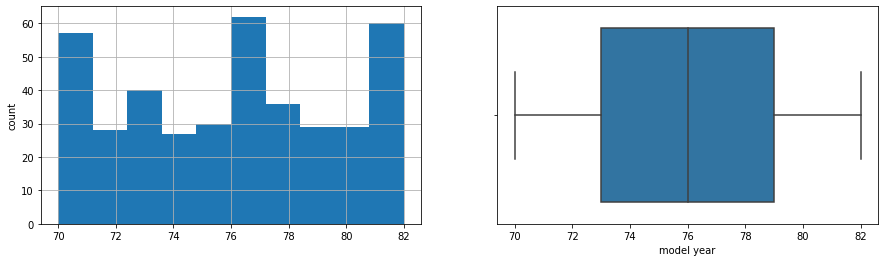

In [12]:
# Uncomment and complete the code by filling the blanks 

for col in data.columns:
     print(col)
     print('Skew :',round(data[col].skew(),2))
     plt.figure(figsize=(15,4))
     plt.subplot(1,2,1)
     data[col].hist()
     plt.ylabel('count')
     plt.subplot(1,2,2)
     sns.boxplot(x=data[col])
     plt.show()

**Observations:**

- The categorical variables (cylinder and model year) are highly imbalanced. 
- The acceleration data appears to be close to normal in distribution. 
- As noted above, all variables have a slight positive skew.  Horsepower has the highest skew (1.11) and model year has the lowest skew (0.01). 
- There are a few outliers for the variables mpg, horsepower, and acceleration, but their values are not very extreme compared to the upper and lower whiskers.  

#### Checking correlation

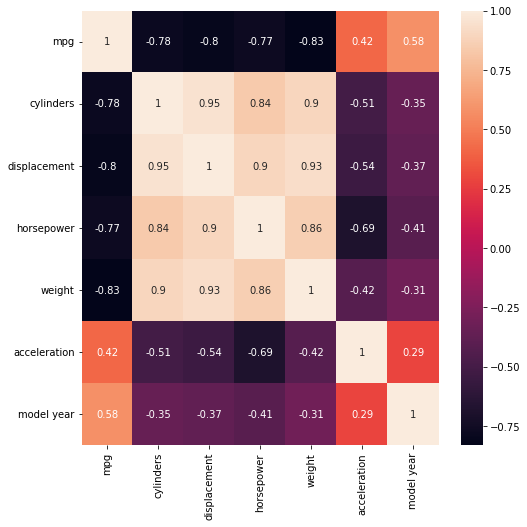

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

**Observations:**
- The variable mpg has strong negative correlation with cylinders, displacement, horsepower, and weight.
- horsepower and acceleration are negatively correlated.
- The variable weight has strong positively correlation with horsepower, displacement and cylinders
- model year is positively correlated with mpg.

#### Scaling the data

In [14]:
# scaling the data
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [15]:
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


## Principal Component Analysis

#### Question 3:

- **Apply the PCA algorithm with number of components equal to the total number of columns in the data with random_state=1 (2 Marks)**
- **Write observations on the variance explained by components (2 Marks)**

In [16]:
#Defining the number of principal components to generate 
n=data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(random_state=1) #Apply the PCA algorithm with random state = 1
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled)) #Fit and transform the pca function on scaled data

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

Text(0, 0.5, 'Cumulative Explained Variance')

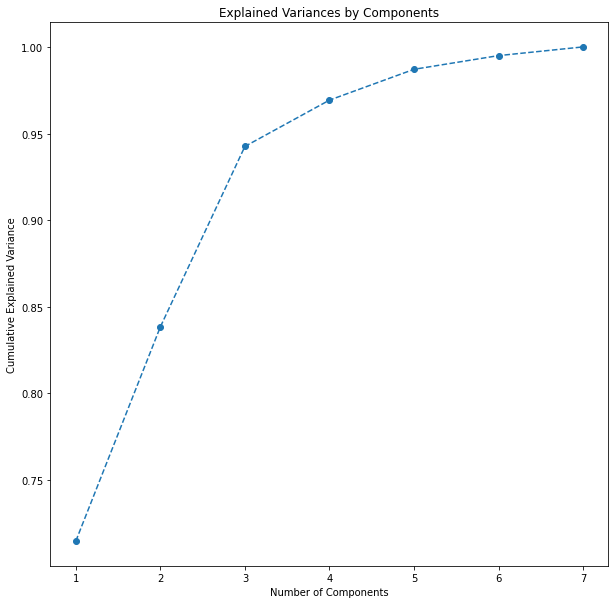

In [17]:
# visualize the explained variance by individual components
plt.figure(figsize = (10,10))
plt.plot(range(1,8), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [18]:
# find the least number of components that can explain more than 90% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  3


**Observations:**

- The first Principal component (PC) alone explains about 71-72% of the variance, the first two PCs together explain about 84-85% of the variance.  The first three PCs together explain about 95% of the variance.  
- The remaining 4 PCs together explain 5% of the variance.  It is worth consider whether there is much merit in preserving these last four PCs, since 95% of the variance is already captured in the first three PCs, and there is diminishing returns in preserving the remaining four PCs.  

In [19]:
pc_comps = ['PC1','PC2','PC3']
data_pca = pd.DataFrame(np.round(pca.components_[:3,:],2),index=pc_comps,columns=data_scaled.columns)
data_pca.T

,PC1,PC2,PC3
mpg,-0.40,-0.21,-0.26
cylinders,0.42,-0.19,0.14
displacement,0.43,-0.18,0.10
horsepower,0.42,-0.09,-0.17
weight,0.41,-0.22,0.28
acceleration,-0.28,0.02,0.89
model year,-0.23,-0.91,-0.02


#### Question 4: **Interpret the coefficients of three principal components from the below dataframe (6 Marks)**

In [ ]:
def color_high(val):
    if val <= -0.40: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.40:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


**Observations:**

- Each principal component (PC1, PC2, and PC3) is a linear combination of the 7 variables (mpg, cylinders, displacement, horsepower, weight, acceleration, and model year) of the original (scaled) dataframe. 
- PC1 is most strongly influenced or weighted (positively) by cylinders, displacement, horsepower, and weight.  PC1 is also most strongly (negatively) influenced by mpg.  The scaled variables cylinders, displacement, horsepower, and weight almost equally impact PC1 with a weight of between 0.41 and 0.43. The scaled variable mpg has an almost equal and opposite effect on PC1 (-0.4).
- Similarly, PC2 is most strongly (negatively) affected by the scaled model year (coefficient of -0.91).  The remaining scaled variables do not significantly impact PC2.  
- PC3 depends most strongly (positively) on acceleration (coefficient of 0.89). The remaining variables have less of an influence on PC3.      

#### We can also visualize the data in 2 dimensions using first two principal components 

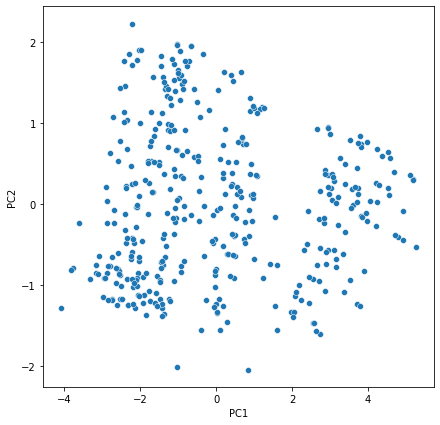

In [20]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=data_pca1[0],y=data_pca1[1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

**Let's try adding hue to the scatter plot**

#### Question 5: 

- **Create a scatter plot for first two principal components with hue = 'cylinders' (2 Marks)** 
- **Write your observations on the plot (2 Marks)**

Text(0, 0.5, 'PC2')

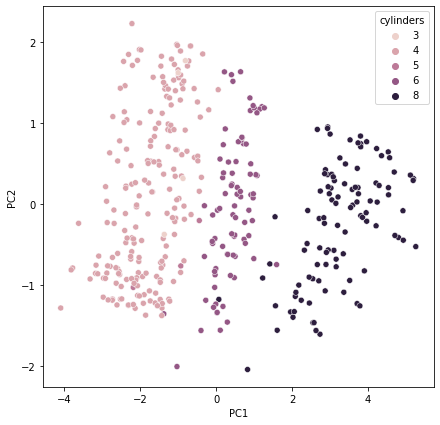

In [21]:
df_concat = pd.concat([data_pca1, data], axis=1)

plt.figure(figsize = (7,7))
#Create a scatter plot with x=0 and y=1 using df_concat dataframe
sns.scatterplot(x=df_concat[0],y=df_concat[1],hue=df_concat['cylinders'])
plt.xlabel("PC1")
plt.ylabel("PC2")

**Observations:**

- Consistent with the observation above, PC2 is not strongly affected by or correlated with the variable cylinders. Thus, in the direction of PC2, there is no seperability of clusters.  
- On the other hand, there is a correlation between PC1 and cylinders and there are three visually separable clusters in the direction of PC1.  The first cluster is cylinders 3 and 4 (PC1 < ~-0.5), the second cluster is cylinders 5 and 6 (PC1 > ~-0.5 and PC1 < ~1), and the third cluster is cylinders 8 (PC1 > ~1).   

## t-SNE

#### Question 6: 
- **Apply the TSNE embedding with 2 components for the dataframe data_scaled (use random_state=1) (2 Marks)**
- **Write your observations on the below scatter plots (2 Marks)**   

In [22]:
tsne = TSNE(random_state=1)  #Apply the TSNE algorithm with random state = 1
data_tsne = tsne.fit_transform(data_scaled) #Fit and transform tsne function on the scaled data

In [23]:
data_tsne.shape

(398, 2)

In [24]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])

In [25]:
data_tsne.head()

,Component 1,Component 2
0,-38.088413,-15.912958
1,-37.404369,-17.995850
2,-38.050472,-17.063194
3,-37.718334,-16.476006
4,-38.404663,-16.763493


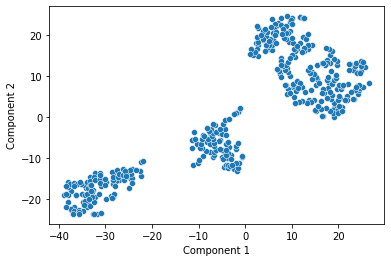

In [26]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1])

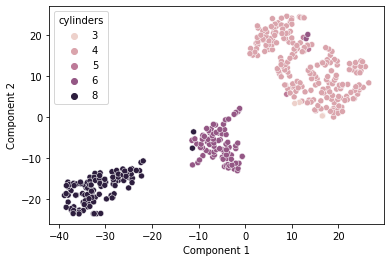

In [27]:
# Let's see scatter plot of the data w.r.t number of cylinders
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1],hue=data.cylinders)

**Observations:**

- The clusters obtained are similar to the PCA algorithm above, namely cluster 1 is cylinders 3 and 4, cluster 2 is cylinders 5 and 6, and cluster 3 is cylinders 8. 
- More importantly, though, the clusters are far more separable with t-SNE than they were with PCA. 
- The separability is better along component 1 than component 2.  

In [28]:
# Let's assign points to 3 different groups
def grouping(x):
    first_component = x['Component 1']
    second_component = x['Component 2']
    if (first_component> 0) and (second_component >0): 
        return 'group_1'
    if (first_component >-20 ) and (first_component < 5):
        return 'group_2'
    else: 
        return 'group_3'

In [29]:
data_tsne['groups'] = data_tsne.apply(grouping,axis=1)

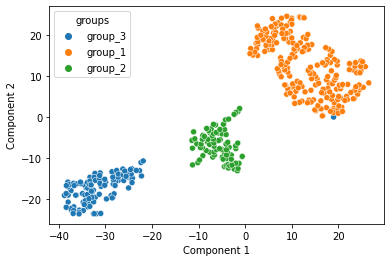

In [30]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1],hue=data_tsne.iloc[:,2])

In [31]:
data['groups'] = data_tsne['groups'] 

#### Question 7: 
- **Complete the following code by filling the blanks (2 Marks)**
- **Write your observations on different groups w.r.t different variables (4 Marks)**

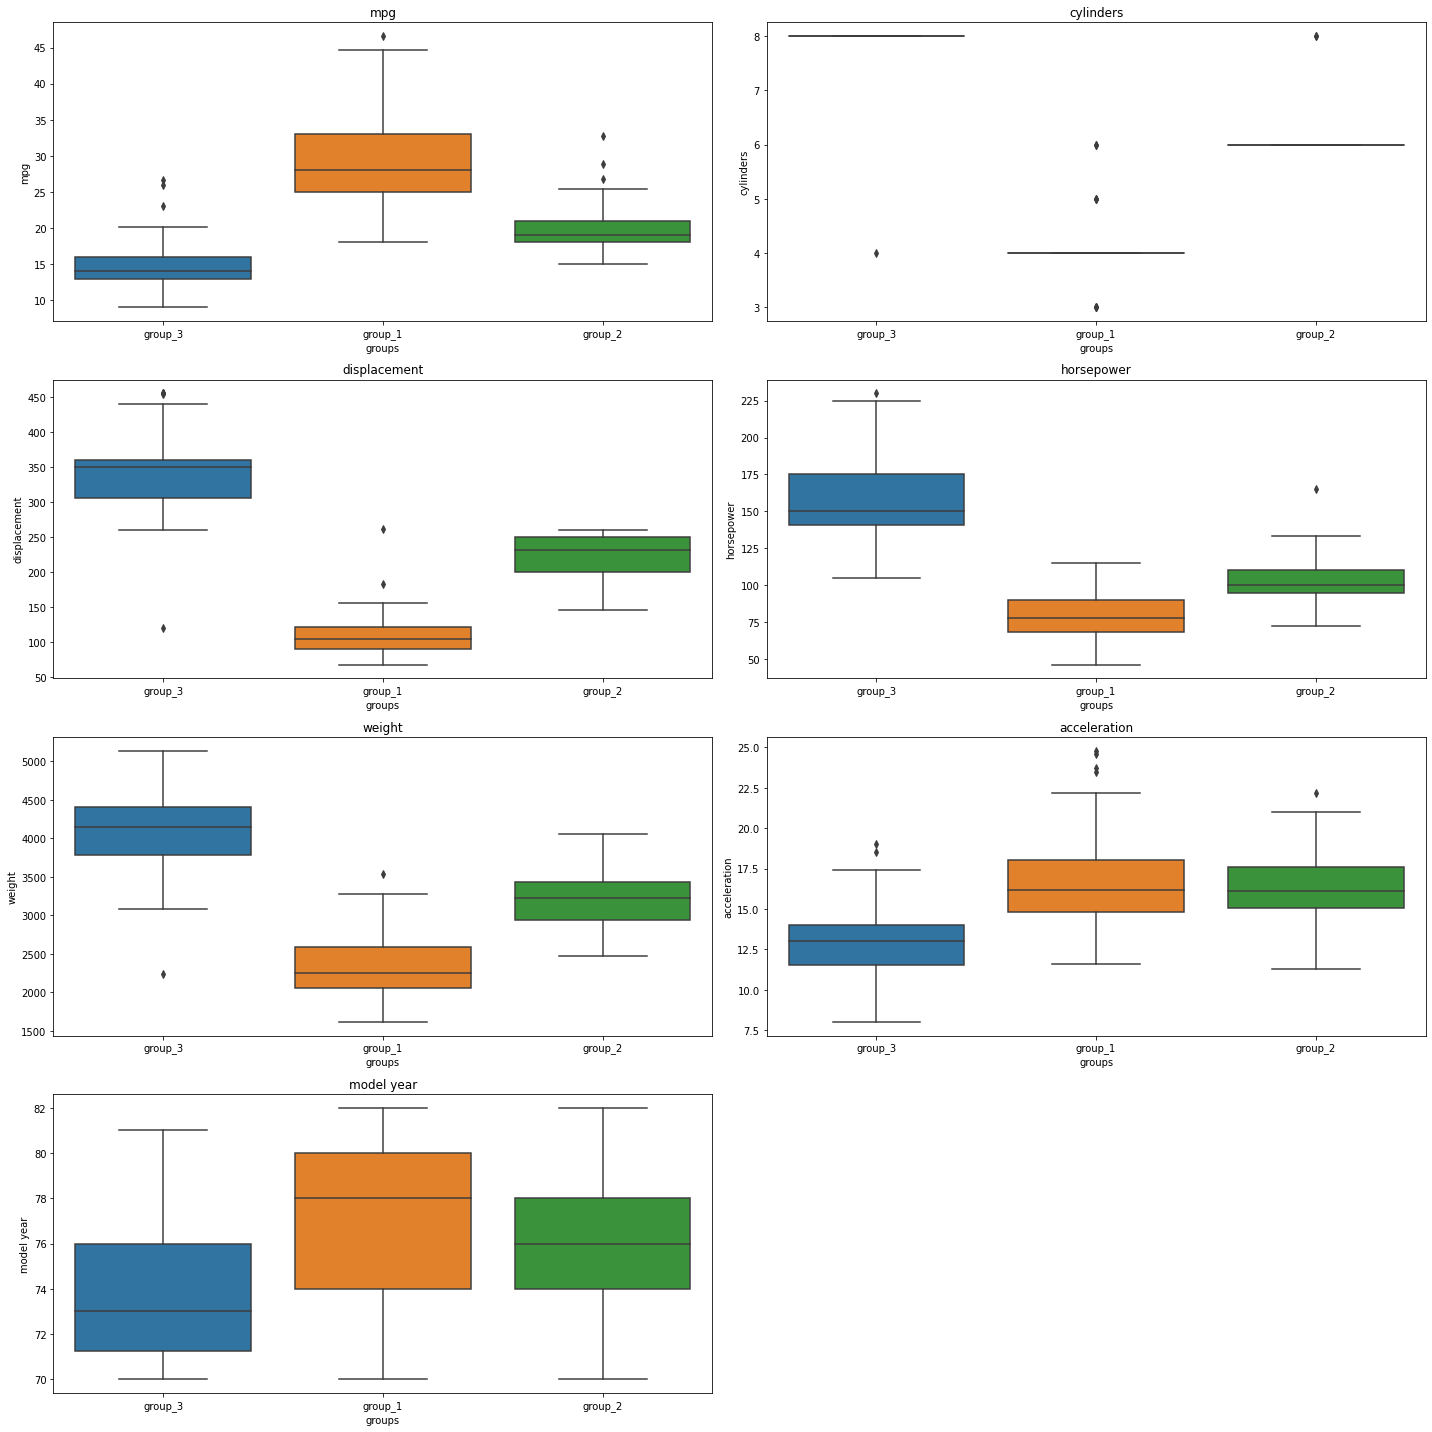

In [32]:
all_col = data.columns.tolist()
plt.figure(figsize=(20, 20))

for i, variable in enumerate(all_col):
    if i==7:
        break
    plt.subplot(4, 2, i + 1)
    #Create boxplot with groups on the x-axis and variable on the y-axis (use the dataframe data)
    sns.boxplot(x=data['groups'], y=data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

**Observations:**

- There is barely any separability between the groups 1, 2, and 3 based on the variables model year and acceleration.  
- On the other hand, barring a few outliers, there is perfect sepearability between the three groups using the variable cylinders (which was used to create the 3 groups in the first place).
- Using the variable displacement, groups 1 and 3 are completely separable, whereas groups 2 and 3 or groups 1 and 2 are not separable.  
- Using variables mpg, horsepower, and weight, groups 1 and 3 are somewhat separable, whereas groups 1 and 2 or groups 2 and 3 are not as separable.    